<a href="https://colab.research.google.com/github/Jetsadakorn192-7/Data-analytics/blob/main/Lab%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('https://raw.githubusercontent.com/Kuntal-G/Machine-Learning/master/R-machine-learning/data/banknote-authentication.csv')

In [ ]:
dataset.head()

,variance,skew,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
X = dataset.drop(['class'], axis=1).values
y = dataset['class'].values
y = y.reshape(y.shape[0],1)

In [ ]:
def define_parameters(n_weights):
  w = np.random.randn(n_weights,1)
  b = np.random.randn()
  return w, b

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def sigmoid_der(x):
  return sigmoid(x)*(1-sigmoid(x))

In [ ]:
def predictions(w, b, X):
  XW = np.dot(X,w) + b
  z = sigmoid(XW)
  return z

In [ ]:
def find_cost(z,y):
  m = y.shape[0]
  total_cost = (1/m)* np.sum(np.square(z-y))
  return total_cost

In [ ]:
def find_derivatives(X,y,z):
  m = y.shape[0]
  dcost_dpred = (1/m)*(z-y)
  dpred_dz = sigmoid_der(z)
  z_delta = dcost_dpred * dpred_dz
  dz_dw = X.T
  dw = np.dot(dz_dw, z_delta)
  db = np.sum(z_delta)
  return dw, db

In [ ]:
def update_weights(w, b, dw, db, lr):
    w = w - lr*dw
    b = b - lr*db
    return w,b

In [ ]:
def multi_logistic_regression(X, y, lr, epochs):
  error_list = []
  lenw = X.shape[1]
  w, b = define_parameters(lenw)
  for i in range(epochs):
    z = predictions(w, b, X)
    cost = find_cost(z, y)
    error_list.append(cost)
    dw, db = find_derivatives (X,y,z)
    w, b = update_weights(w, b, dw, db, lr)
    if i % 50 == 0:
      print(cost)

  return w, b, error_list


In [ ]:
lr = 0.05
epochs = 2000
w, b, error_list = multi_logistic_regression(X, y, lr, epochs)

0.4386473382547059
0.35063612831450847
0.18101909322131973
0.12822044960247075
0.10339953384086152
0.08871298149475243
0.07878768983642644
0.07148387074088951
0.06578804877933239
0.061159949988192644
0.05728504823426724
0.05396712531804281
0.051076739120235685
0.04852449862289236
0.04624628480687563
0.044194622958454007
0.042333407374601256
0.040634544512948
0.03907574167516761
0.03763900566910242
0.036309596173606726
0.03507527888345194
0.033925781447789675
0.03285238977503837
0.031847643507731976
0.030905102864660146
0.03001916770316648
0.02918493537151008
0.02839808777314463
0.027654800707558963
0.026951670395820113
0.026285653404581076
0.025654017119988066
0.0250542986050484
0.02448427017616912
0.023941910408319122
0.023425379559294423
0.02293299861689624
0.022463231336220343
0.022014668760441142


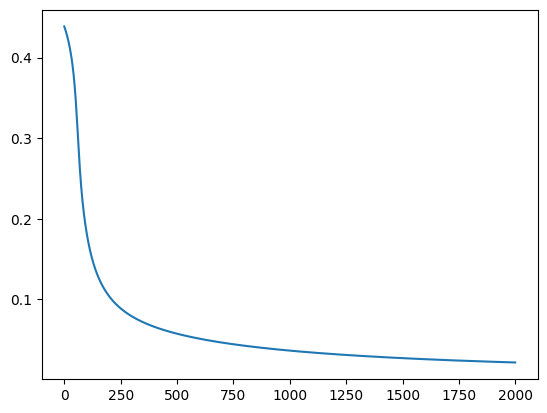

In [ ]:
plt.plot(error_list)

In [ ]:
z = predictions(w, b, X)
y_pred = []
for i in z:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

y_true = sum(y.tolist() , [])

correct = 0
for i in y_true :
  if y[i] == y_pred[i]:
    correct = correct + 1
print("Accuracy: " + str(correct/len(y_true) * 100))

Accuracy: 100.0


# Neural Networks with Single Output from Scratch

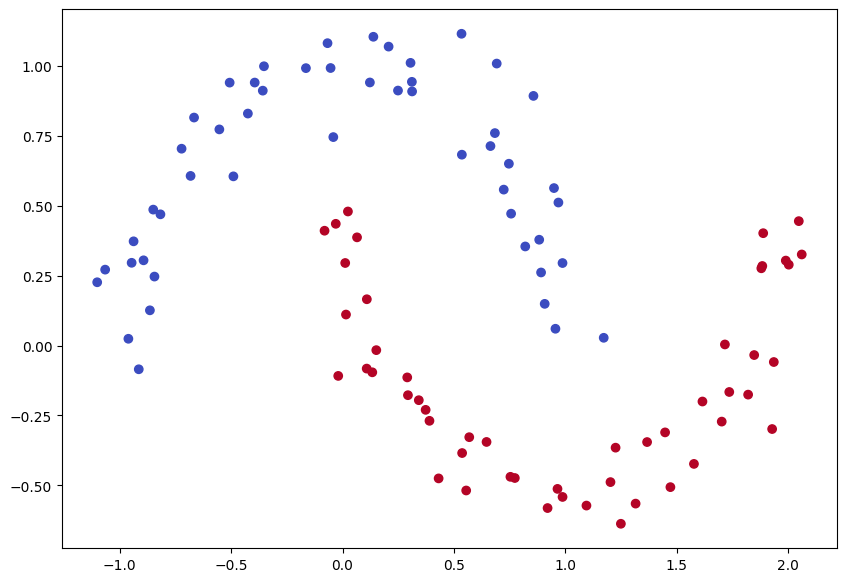

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X, y = datasets.make_moons(100, noise=0.1)
x1 = X[:,0]
x2 = X[:,1]

plt.figure(figsize=(10,7))
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)

In [ ]:
y = y.reshape(y.shape[0],1)

In [ ]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [ ]:
def define_parameters(weights):
  weight_list = []
  bias_list = []
  for i in range(len(weights) - 1):
    w = np.random.randn(weights[i],weights[i+1])
    b = np.random.randn()
    weight_list.append(w)
    bias_list.append(b)
  return weight_list, bias_list

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def sigmoid_der(x):
  return sigmoid(x)*(1-sigmoid(x))

In [ ]:
def predictions(w , b, X):
  zh = np.dot(X,w[0]) + b[0]
  ah = sigmoid(zh)
  zo = np.dot(ah,w[1]) + b[1]
  ao = sigmoid(zo)
  return ao

In [ ]:
def find_cost(ao,y):
  m = y.shape[0]
  total_cost = (1/m)* np.sum(np.square(ao-y))
  return total_cost

In [ ]:
def find_derivatives(w , b, X):
  zh = np.dot(X,w[0]) + b[0]
  ah = sigmoid(zh)

  zo = np.dot(ah,w[1]) + b[1]
  ao = sigmoid(zo)

  # Backpropagation phase 1
  m = y.shape[0]
  dcost_dao = (1/m)*(ao-y)
  dao_dzo = sigmoid_der(zo)
  dzo_dwo = ah.T

  dwo = np.dot(dzo_dwo , dcost_dao * dao_dzo)
  dbo = np.sum(dcost_dao * dao_dzo)

  # Backpropagation phase 2

  # dcost_wh = dcost_dah * dah_dzh * dzh_dwh
  # dcost_dah = dcost_dzo * dzo_dah

  dcost_dzo = dcost_dao * dao_dzo
  dzo_dah = w[1].T

  dcost_dah = np.dot(dcost_dzo , dzo_dah)

  dah_dzh = sigmoid_der(zh)
  dzh_dwh = X.T
  dwh = np.dot(dzh_dwh , dah_dzh * dcost_dah)
  dbh = np.sum(dah_dzh * dcost_dah)

  return dwh, dbh, dwo, dbo

In [ ]:
def update_weights(w , b, dwh, dbh, dwo, dbo, lr):
  w[0] = w[0] - lr*dwh
  w[1] = w[1] - lr*dwo
  b[0] = b[0] - lr*dbh
  b[1] = b[1] - lr*dbo

  return w, b

In [ ]:
def my_neural_network(X , y, lr, epochs):
  error_list = []
  input_len = X.shape[1]
  output_len = y.shape[1]
  w, b = define_parameters([input_len , 4 ,output_len])

  for i in range(epochs):
    ao = predictions(w, b, X)
    cost = find_cost(ao, y)
    error_list.append(cost)
    dwh, dbh, dwo, dbo = find_derivatives(w, b, X)
    w, b = update_weights(w, b, dwh, dbh, dwo, dbo, lr)
    if i % 50 == 0:
      print(cost)

  return w, b, error_list

In [ ]:
lr = 0.5
epochs = 2000
w, b, error_list = my_neural_network(X, y, lr, epochs)

0.420576773526906
0.1465387851789338
0.12617746238650168
0.11570597079471208
0.10850813272509596
0.10337608010852294
0.09958560452217739
0.09670335366165751
0.09446206947265266
0.0926891984440786
0.09126791271989423
0.09011580416073578
0.08917288078317867
0.0883944589996478
0.08774670296567845
0.08720366848471853
0.08674525781893187
0.08635576132720636
0.08602279652438301
0.08573652577983962
0.08548907373090579
0.08527408984725415
0.08508641749767577
0.08492184175007911
0.08477689577303969
0.08464871114727117
0.08453490130214526
0.08443347011357041
0.08434273974659046
0.08426129331873805
0.0841879290544539
0.08412162340775241
0.08406150122892356
0.0840068114979951
0.08395690748351937
0.08391123043924369
0.0838692961445392
0.08383068374251369
0.08379502644380786
0.08376200375248426
